# Task- 1- Prediction Using Superised ML

In [1]:
# importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
# reading the data
data=pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()# by default gives the last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#checking the no of rows nd coloumns in the dataset
data.shape

(25, 2)

In [5]:
data.isnull().sum()# checking for the null value in the dataset

Hours     0
Scores    0
dtype: int64

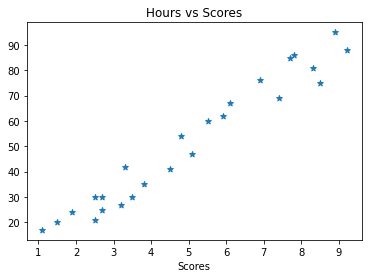

In [6]:
plt.scatter(data['Hours'],data['Scores'],marker='*') # plotting the hours and scores with the help of scatterplot
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.xlabel("Scores")
plt.show()

In [7]:
data.corr() # by default it will give the correlation by pearson method

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

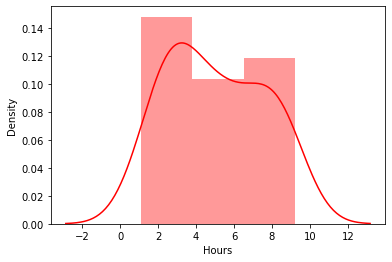

In [8]:
sb.distplot(data['Hours'],color='red')

<AxesSubplot:xlabel='Scores', ylabel='Density'>

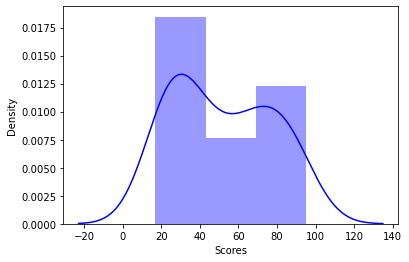

In [9]:
sb.distplot(data['Scores'],color='blue')

In [10]:
fs=data.iloc[:,:-1].values
label=data.iloc[:,1].values

In [11]:
#fs=data.drop('Scores',axis=1)
#label=data['Scores']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_tr,x_ts,y_tr,y_ts=train_test_split(fs,label,test_size=0.25,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
algo=LinearRegression()


In [16]:
algo.fit(x_tr,y_tr)
print("model trained")

model trained


In [17]:
fs,label

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

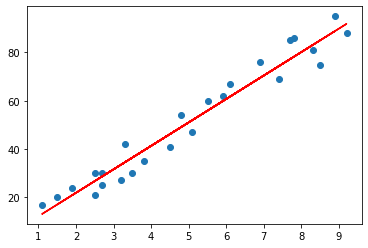

In [25]:
m=algo.coef_
c=algo.intercept_
Y=m*fs+c
plt.scatter(fs,label)
plt.plot(fs,Y,color='red')
plt.show()

In [19]:
algo.score(x_ts,y_ts)

0.9553509219739938

In [20]:
predicted=algo.predict(x_ts)
pd.DataFrame({'ACTUAL_VALUE':y_ts,'PREDICTED_VALUE':predicted})



,ACTUAL_VALUE,PREDICTED_VALUE
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


<AxesSubplot:ylabel='Density'>

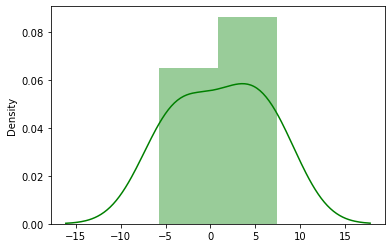

In [21]:
sb.distplot(y_ts-predicted,color='green')#plot of difference beween the actual and the predicted value.

In [22]:
Hours=float(input("enter the number of hours"))
percentage=algo.predict([[Hours]])
print("predicted score:{}".format(percentage))

enter the number of hours9.25
predicted score:[92.33571987]


In [23]:
from sklearn import metrics

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_ts,predicted))
print('R2 Score:',metrics.r2_score(y_ts,predicted))

Mean Absolute Error: 4.425394675156183
R2 Score: 0.9553509219739938
